In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

sat = pd.read_csv('../data/Modified_Satellite_Database.csv')

sat.head()

,Name of Satellite,Country,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime,Year of Launch
0,1HOPSAT,USA,0.0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,0.5,2019
1,Aalto-1,Finland,0.0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,2.0,2017
2,ABS-2,Multinational,75.0,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,15.0,2014
3,ABS-2A,Multinational,-75.0,35700.0,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,15.0,2016
4,ABS-3A,Multinational,-3.0,35788.0,35803.0,0.000178,0.10,1436.00,2000.0,2015-03-02,15.0,2015


# Graphing

Displayed columns to get the right column values for the graph.

In [2]:
sat.columns

Index(['Name of Satellite', 'Country', 'Longitude of GEO (degrees)',
       'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)',
       'Period (minutes)', 'Launch Mass (kg.)', 'Date of Launch',
       'Expected Lifetime', 'Year of Launch'],
      dtype='object')

'Year of Launch' and 'Expected Lifetime' values used for a scatter graph.

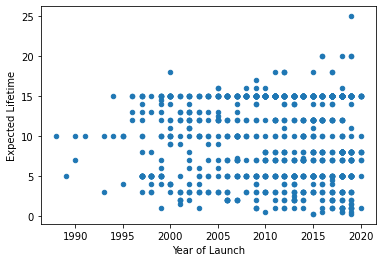

In [3]:
sat.plot(kind = 'scatter', x = 'Year of Launch', y= 'Expected Lifetime')

plt.savefig('../graphs/scatter.png')

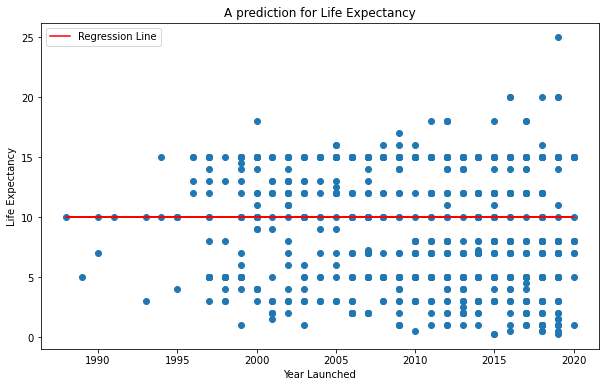

In [4]:
from utils import draw_line

year = sat['Year of Launch'].values
life = sat['Expected Lifetime'].values

draw_line(year, life, slope= 0, intercept = 10, figsize = (10,6) )

In [5]:
# statsmodels api
import statsmodels.api as sm

X = sat['Year of Launch']
y = sat['Expected Lifetime']
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Expected Lifetime   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6915
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.406
Time:                        21:45:40   Log-Likelihood:                -3389.1
No. Observations:                1124   AIC:                             6782.
Df Residuals:                    1122   BIC:                             6792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -27.6249     45.148     -0.612      0.541    -116.210      60.960
Year of Launch     0.0187      0.022      0.832      0.406      -0.025       0.063
==============================================================================
Omnibus:                     5594.657   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.884
Skew:                          -0.213   Prob(JB):                     1.12e-20
Kurtosis:                       1.666   Cond. No.                     6.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

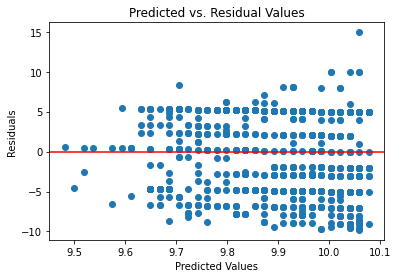

In [6]:
residuals = res.resid
y_pred = res.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residual Values')
plt.show

plt.savefig('../graphs/predicted.png')

In [7]:
ncols = 14
nrows = 15
X = np.zeros(shape = (nrows,ncols))

for i in range(ncols):
    X[:,i] = np.random.normal(size = nrows)
    
y = np.random.normal(size = nrows)

# modified OLS Regression results
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

C:\Users\cappy\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.84
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.159
Time:                        21:45:40   Log-Likelihood:                 21.547
No. Observations:                  15   AIC:                            -15.09
Df Residuals:                       1   BIC:                            -5.181
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4021      0.289      1.391      0.397      -3.272       4.077
x2            -1.3716      0.340     -4.039      0.155      -5.687       2.944
x3             0.3399      0.250      1.359      0.404      -2.838       3.518
x4             0.6309      0.244      2.583      0.235      -2.472       3.734
x5             0.1475      0.179      0.824      0.561      -2.126       2.421
x6             1.0872      0.230      4.737      0.132      -1.829       4.003
x7             0.4645      0.090      5.141      0.122      -0.684       1.612
x8             1.5108      0.392      3.853      0.162      -3.471       6.493
x9            -0.6915      0.337     -2.052      0.289      -4.973       3.590
x10           -0.6840      0.176     -3.885      0.160      -2.921       1.553
x11            0.2506      0.141      1.780      0.326      -1.539       2.040
x12            0.7856      0.161      4.893      0.128      -1.255       2.826
x13            0.7626      0.323      2.360      0.255      -3.344       4.869
x14            1.0905      0.323      3.372      0.184      -3.019       5.200
==============================================================================
Omnibus:                        1.792   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                0.716
Skew:                           0.532   Prob(JB):                        0.699
Kurtosis:                       3.116   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

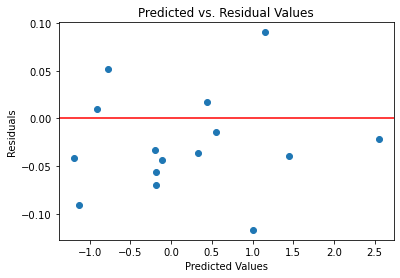

In [8]:
residuals = res.resid
y_pred = res.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residual Values')
plt.show

plt.savefig('../graphs/predicted_mod.png')